In [1]:
!pip install -U langgraph

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [3]:
class MyGraphState(TypedDict):
  count: int
  msg: str

In [4]:
def counter(state: MyGraphState):
  state["count"] += 1
  state["msg"] = f"Counter function has been called {state['count']} time(s)"
  return state

In [5]:
workflow = StateGraph(MyGraphState)

In [6]:
workflow.add_node("Node1", counter)
workflow.add_node("Node2", counter)
workflow.add_node("Node3", counter)

In [7]:
workflow.add_edge(START, "Node1")
workflow.add_edge("Node1", "Node2")
workflow.add_edge("Node2", "Node3")

workflow.add_edge("Node3", END)

In [8]:
app = workflow.compile()

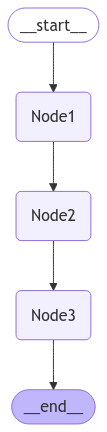

In [9]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()

display(Image(png))

In [10]:
app.invoke({"count": 0, "msg":"hello"})

{'count': 3, 'msg': 'Counter function has been called 3 time(s)'}